# Customer Churn Analysis



## Importing Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import preprocessing
import warnings
from statsmodels.stats.outliers_influence import variance_inflation_factor
warnings.filterwarnings('ignore')
from scipy import stats
import statsmodels.api as sm

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
from statsmodels.stats.outliers_influence import variance_inflation_factor
warnings.filterwarnings('ignore')

# Importing Dataset

In [3]:
df = pd.read_csv('Telecom_customer_churn.csv')

In [4]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## Lets see the column names

In [5]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

## Datatype of Columns

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## Converting Total charge to numeric type

In [7]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [8]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

## Checking Null Values

In [9]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
df.dropna(inplace = True)

In [11]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

 Null values has been removed 

## Checking columns Customer ID

In [12]:
df['customerID'].value_counts()

3096-YXENJ    1
2830-LEWOA    1
9572-MTILT    1
3566-HJGPK    1
0907-HQNTS    1
             ..
1493-AMTIE    1
7977-HXJKU    1
4884-LEVMQ    1
2676-ISHSF    1
6353-BRMMA    1
Name: customerID, Length: 7032, dtype: int64

In [13]:
df1= df.drop(['customerID'], axis =1)

In [14]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


# EDA

## Checking the distribution of the label

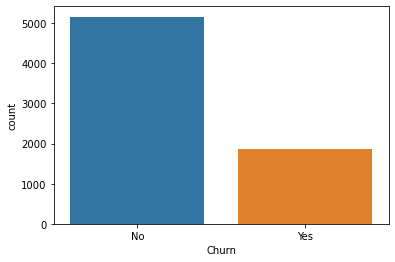

In [15]:
sns.countplot(x='Churn',data=df1)
plt.show()

In [17]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

## Describing Data

In [18]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


<AxesSubplot:xlabel='gender', ylabel='count'>

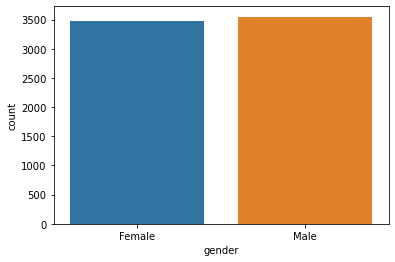

In [19]:
sns.countplot(df['gender'])

In [20]:
df['gender'].value_counts()

Male      3549
Female    3483
Name: gender, dtype: int64

####  Observation- Male and female has equal contracts

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

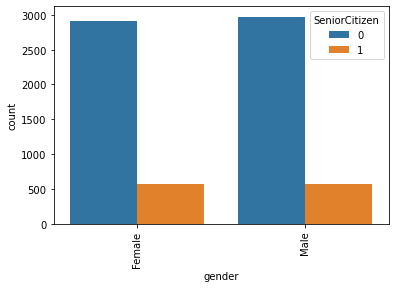

In [21]:
sns.countplot(df['gender'],hue=df['SeniorCitizen'])
plt.xticks(rotation=90)

#### Observation- Lets assume 0 as Not senior citizen and 1 as - Senior citizen.

We can see that Most of the user is not senior citzens

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

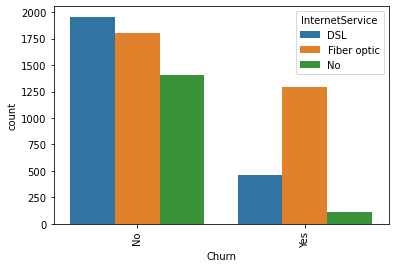

In [22]:
sns.countplot(df['Churn'],hue=df['InternetService'])
plt.xticks(rotation=90)

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

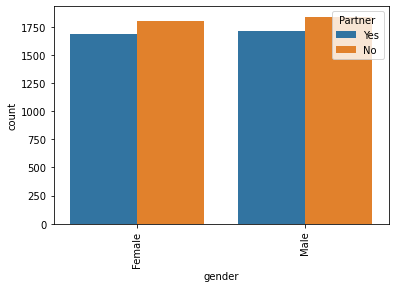

In [23]:
sns.countplot(df['gender'],hue=df['Partner'])
plt.xticks(rotation=90)

<AxesSubplot:xlabel='InternetService', ylabel='Contract'>

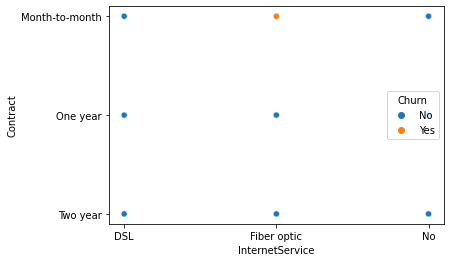

In [24]:
fig, axes = plt.subplots(1, 1, figsize=(6, 4))
sns.scatterplot(x='InternetService', y='Contract', hue='Churn', data=df1)

In [25]:
df1['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

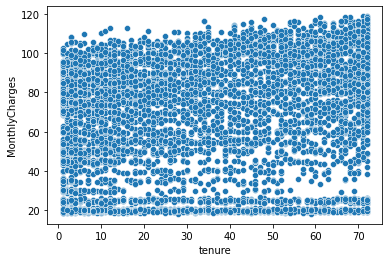

In [26]:
sns.scatterplot(df1['tenure'],df1['MonthlyCharges'], data=df1)

When Tenure increasing monthly charges is remaining constant which is one of the reason users are leaving

### Lets see the distribution of various servious used by customers 

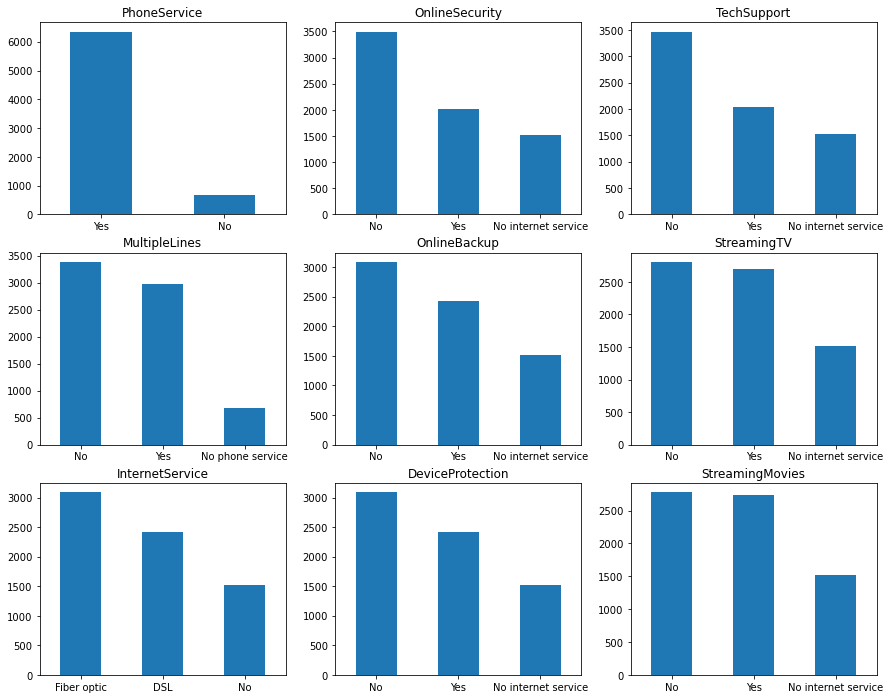

In [27]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = df1[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = df1[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = df1[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item) 

#### Lets see the difference between Monthlycharge and TotalCharges

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

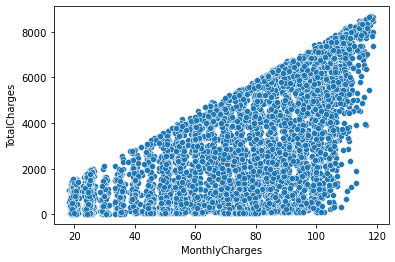

In [28]:
sns.scatterplot(df1['MonthlyCharges'],df1['TotalCharges'], data=df1)

 Total charges incresing as monthlycharges increasing

### Lets see the Churn rate with tenure

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

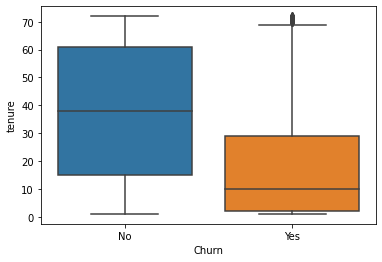

In [30]:
sns.boxplot(x = df1['Churn'], y = df1['tenure'])


### Lets see Churn with MonthlyCharges and Totalcharges

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

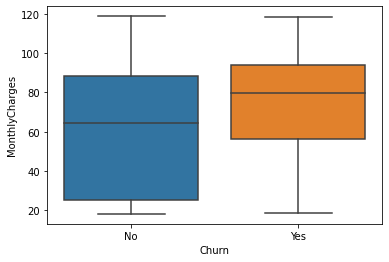

In [31]:
sns.boxplot(x = df1['Churn'], y = df1['MonthlyCharges'])

Observation-  customers churn when the monthly charges are high.

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

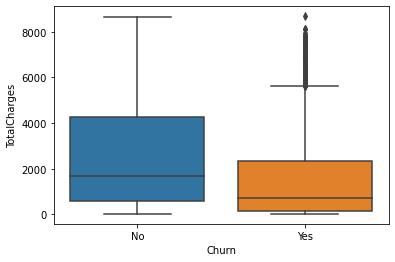

In [32]:
sns.boxplot(x = df1['Churn'], y = df1['TotalCharges'])

## Plotting Scatter plot to check features vs label

## Seperating features and label

In [33]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [34]:
y= df1['Churn']
x= df1.drop(['Churn'], axis =1)

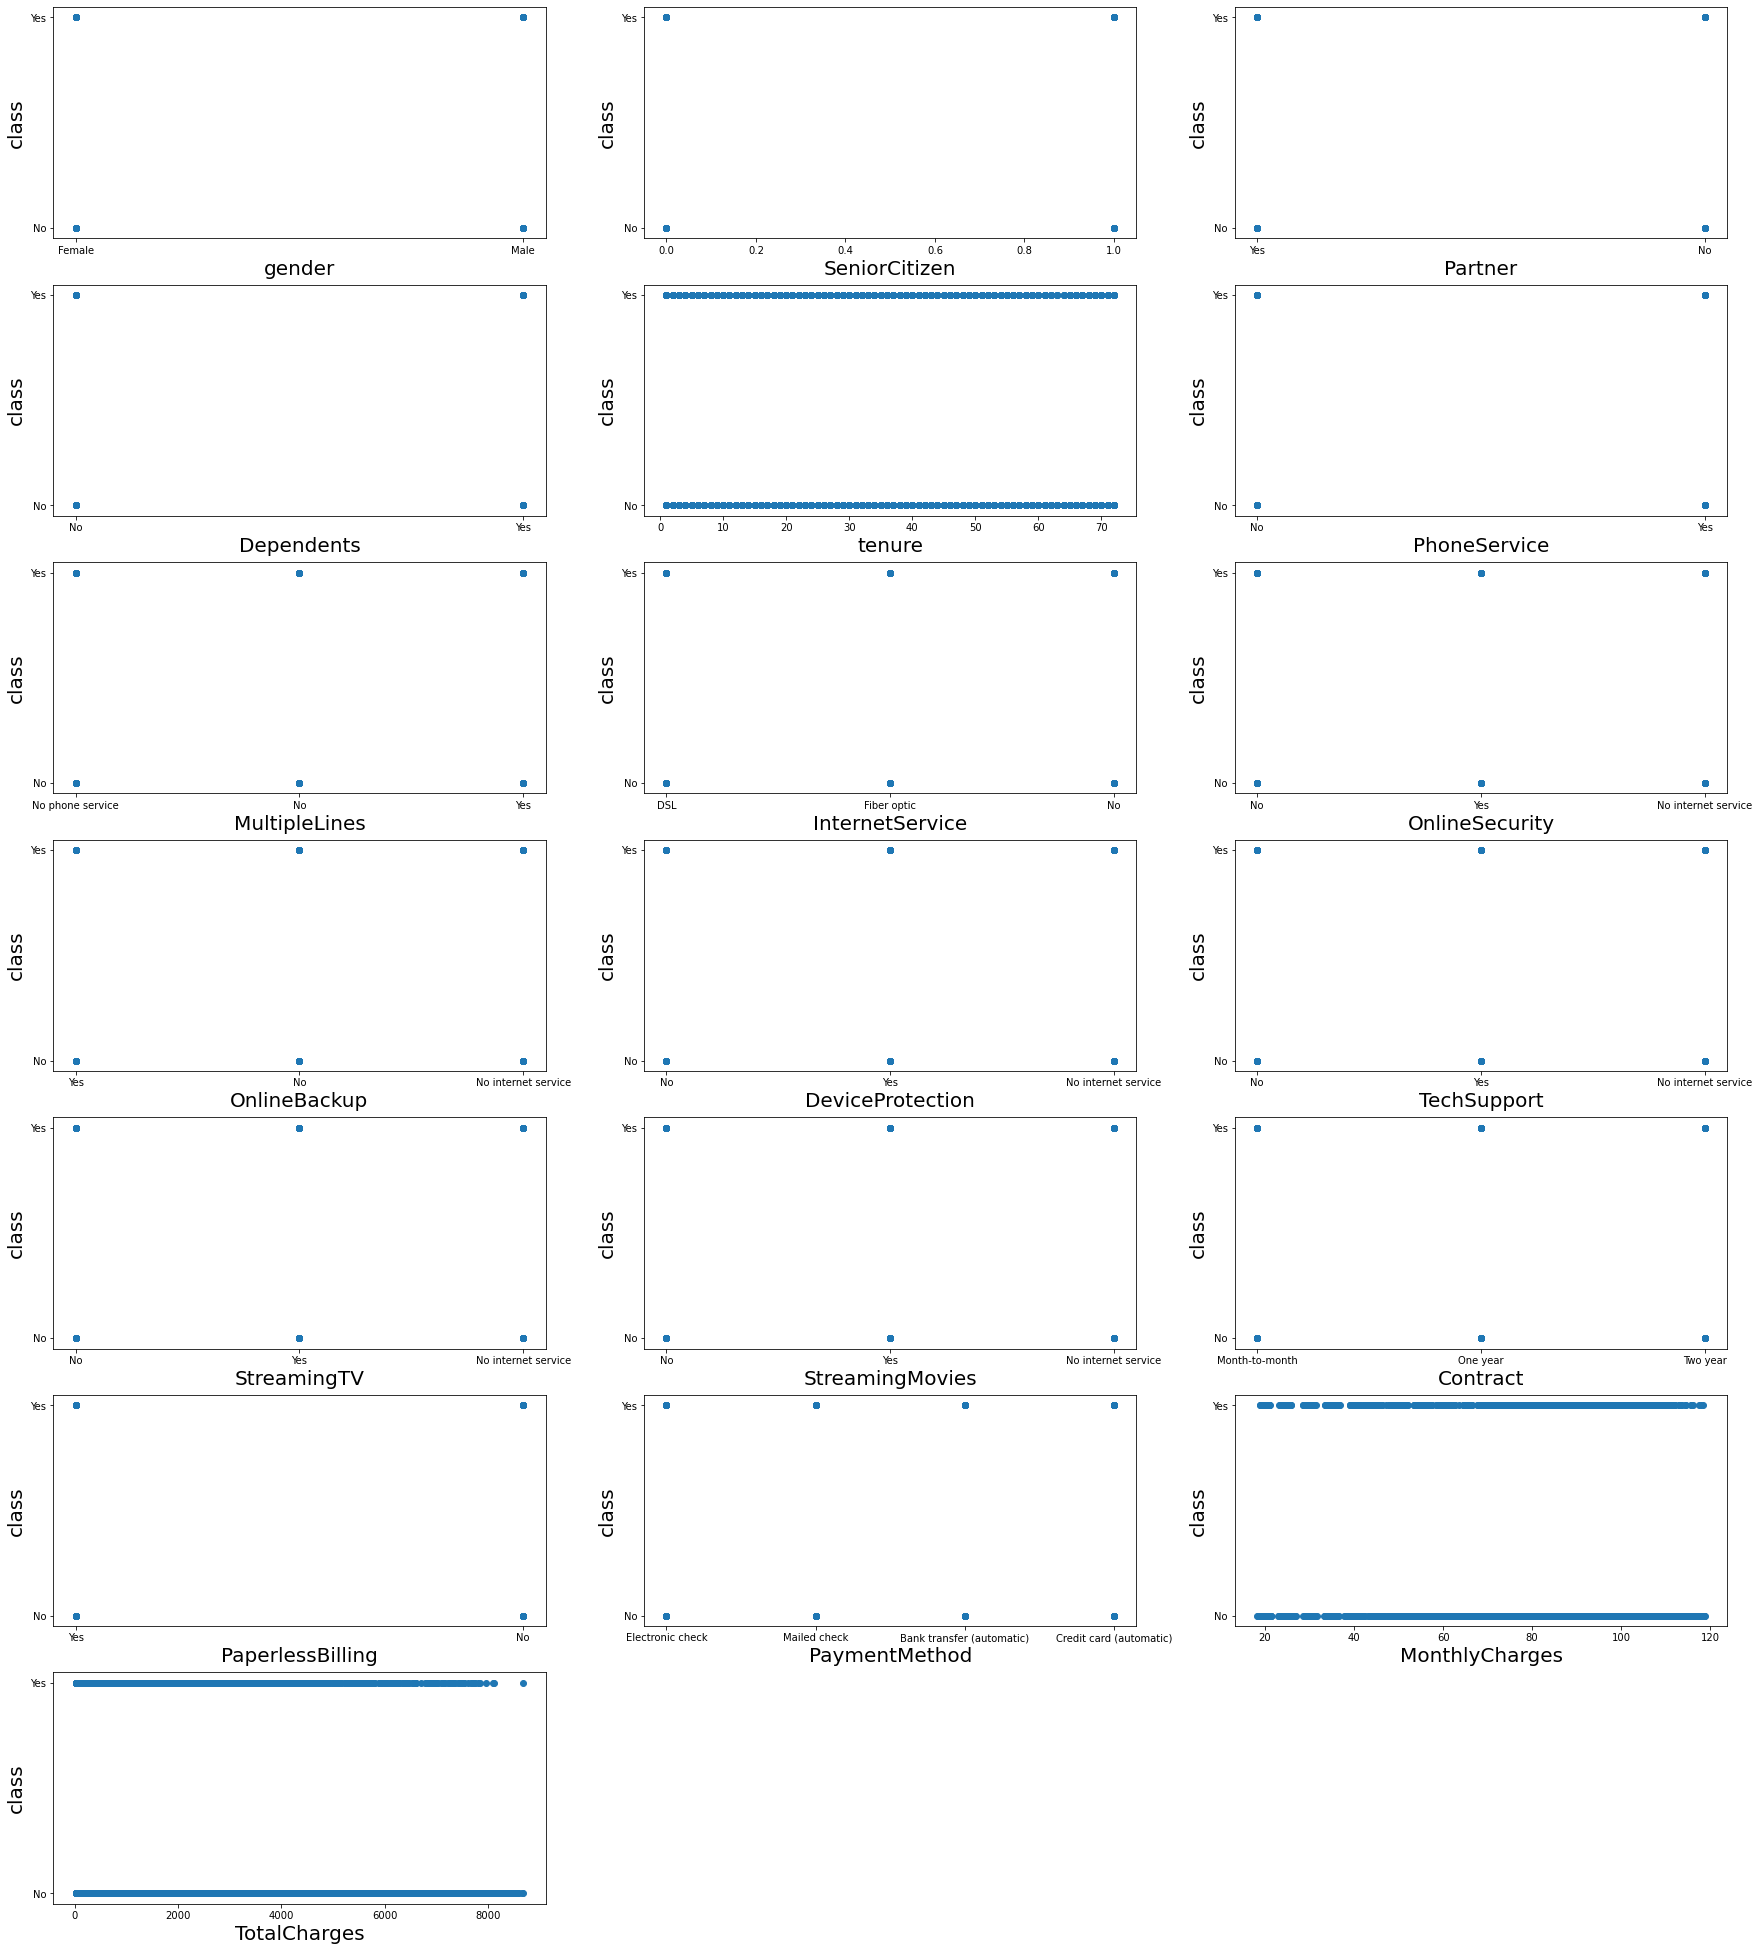

In [35]:
plt.figure(figsize =(30,40),facecolor ='white')
plotnumber = 1
for column in x:
    if plotnumber<=24:
        ax =plt.subplot(8,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('class',fontsize=20)
    plotnumber +=1
plt.show()

## Label Encoder to convert the dataset to numerical

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [37]:
for col in df1.columns:
    if df1[col].dtypes == 'object':
        df1[col] = le.fit_transform(df1[col])

In [38]:
df1.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

In [39]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


# Normal Distribution

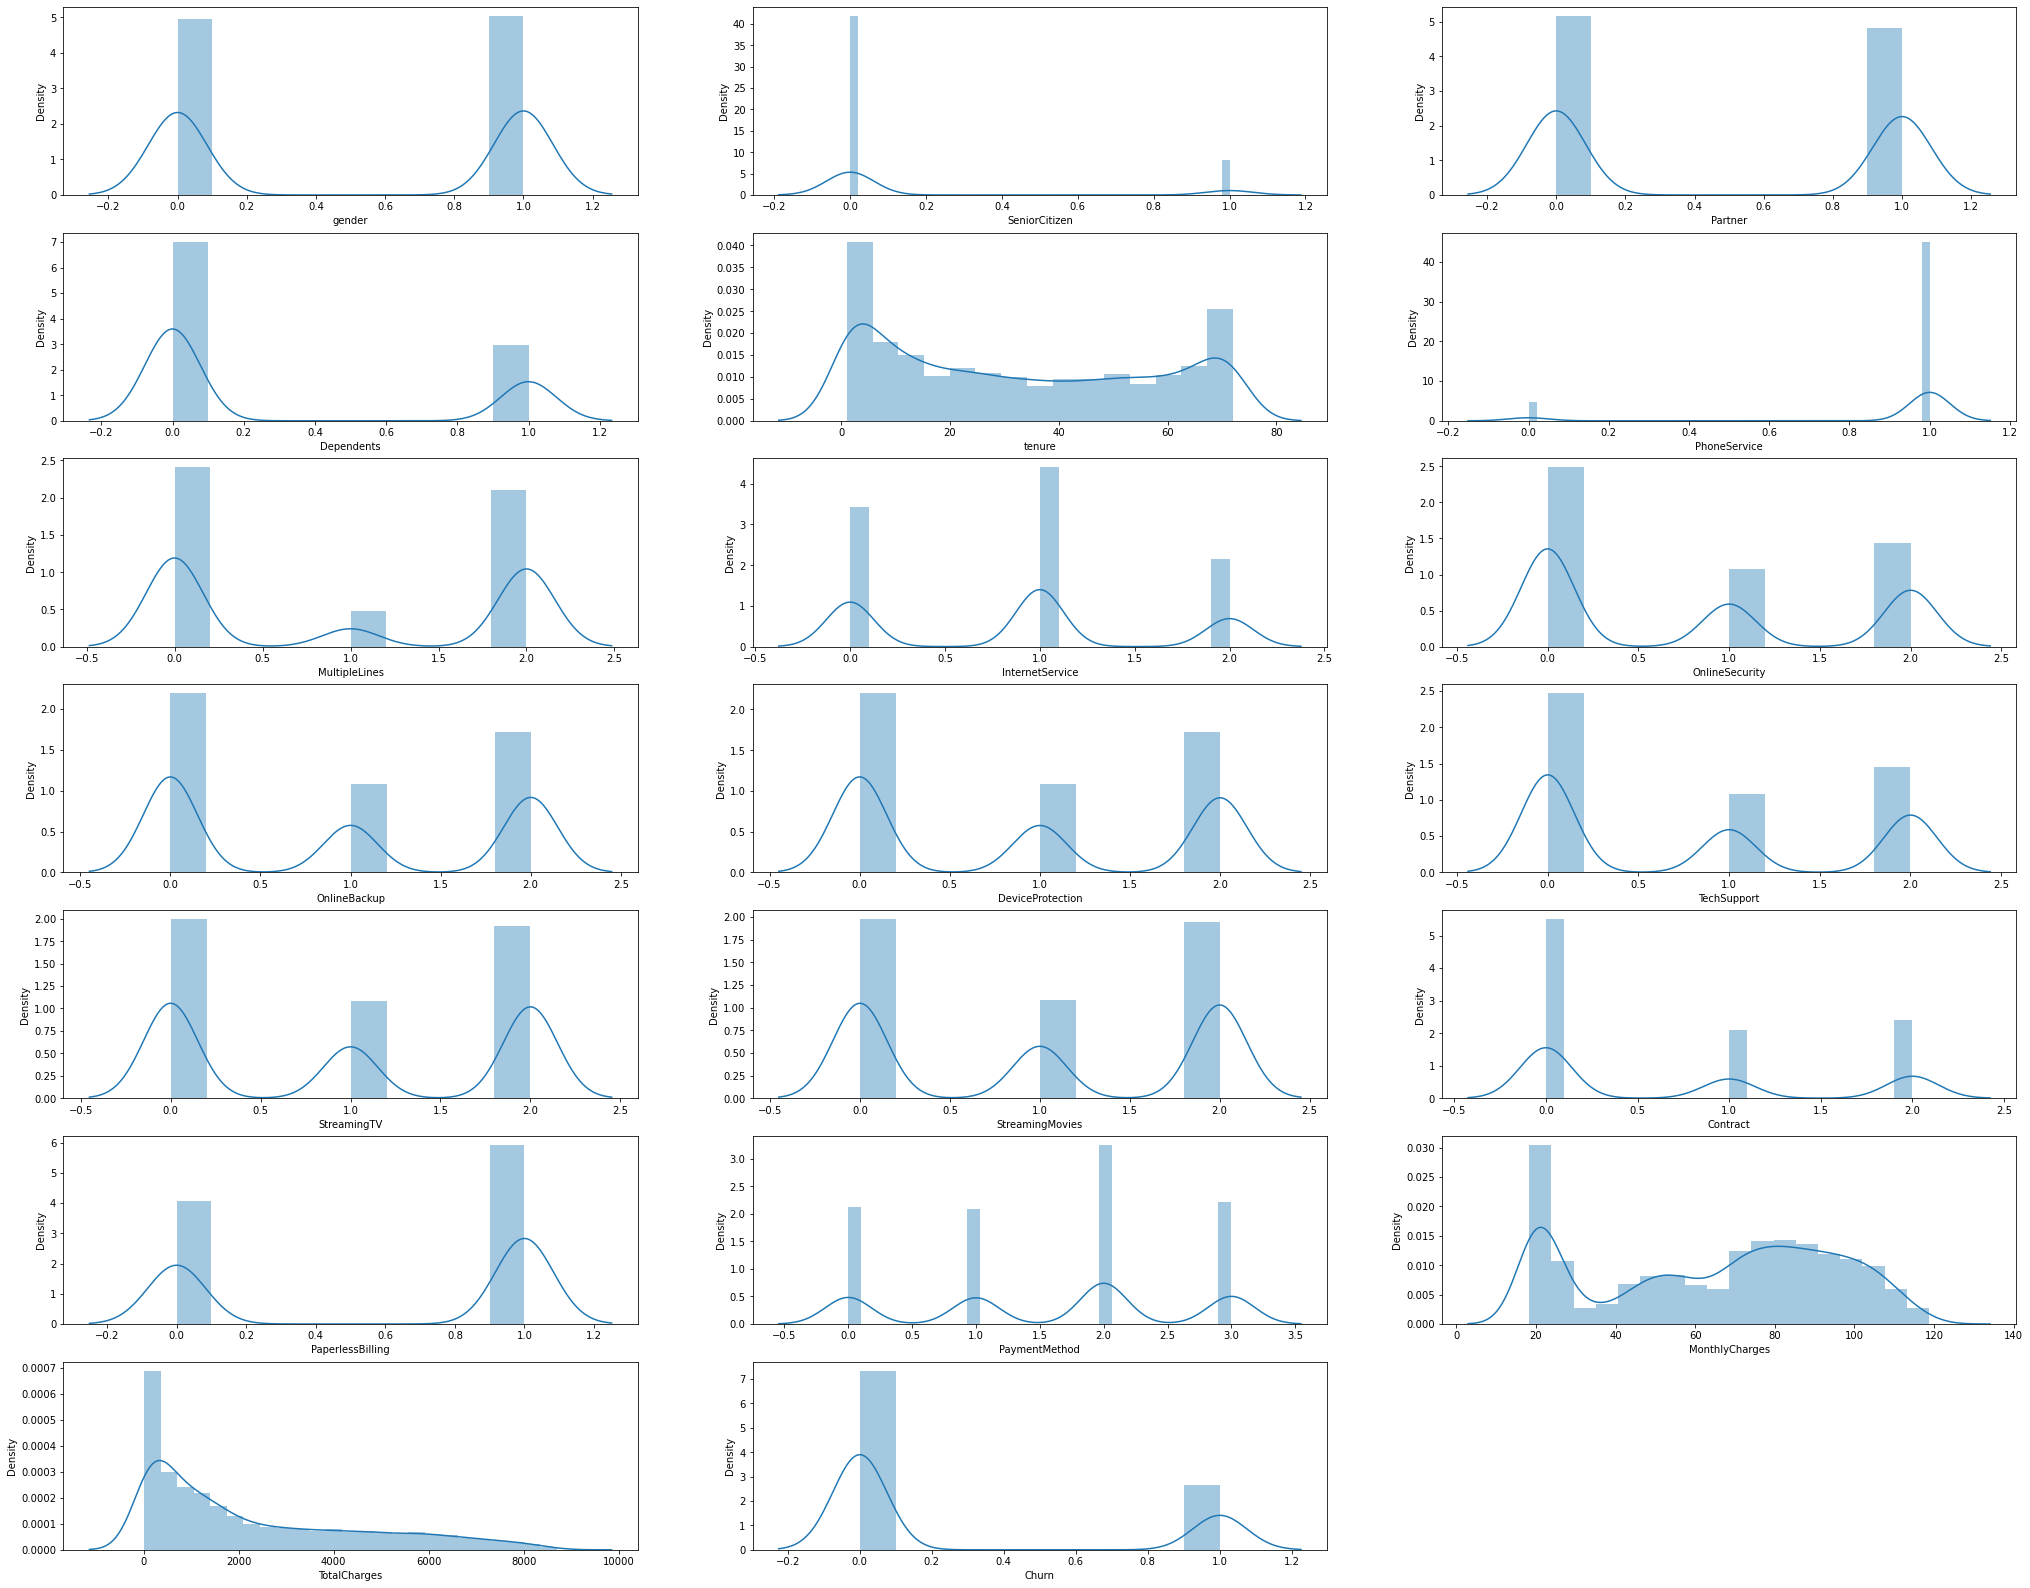

In [40]:
plt.figure(figsize=(35,45))
plotnumber =1

for column in df1:
    if plotnumber <= 31:
        ax = plt.subplot(11,3,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column) 
    plotnumber+=1
plt.show()

## Lets Check the correlation 

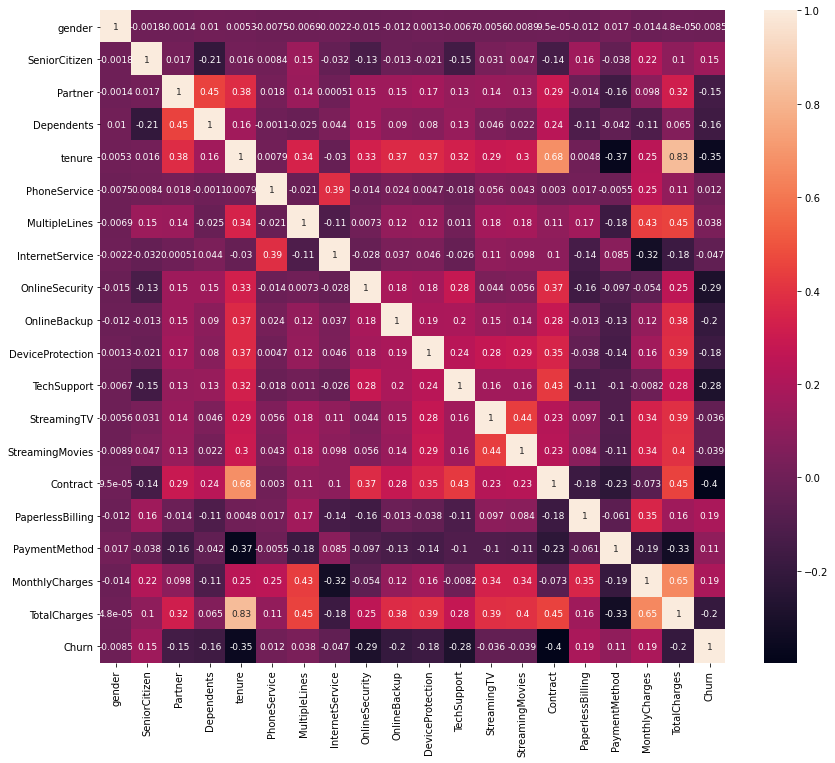

In [41]:
plt.figure(figsize=(14,12))
sns.heatmap(df1.corr(),annot=True, annot_kws={"size": 9})
plt.show()

Observation- 
- TotalCharges and tenure is 83% correlated
- Contract and tenure is 68% correlated
- TotalCharges and MonthlyCharges are 65% correlated

## Checking the Skewness

In [42]:
df1.skew()

gender             -0.018776
SeniorCitizen       1.831103
Partner             0.070024
Dependents          0.880908
tenure              0.237731
PhoneService       -2.729727
MultipleLines       0.118623
InternetService     0.205704
OnlineSecurity      0.418619
OnlineBackup        0.184089
DeviceProtection    0.188013
TechSupport         0.403966
StreamingTV         0.029366
StreamingMovies     0.013851
Contract            0.635149
PaperlessBilling   -0.377503
PaymentMethod      -0.169388
MonthlyCharges     -0.222103
TotalCharges        0.961642
Churn               1.060622
dtype: float64

## Using Boxplot to check the outliers

gender                 AxesSubplot(0.125,0.749828;0.0945122x0.130172)
SeniorCitizen       AxesSubplot(0.238415,0.749828;0.0945122x0.130172)
Partner             AxesSubplot(0.351829,0.749828;0.0945122x0.130172)
Dependents          AxesSubplot(0.465244,0.749828;0.0945122x0.130172)
tenure              AxesSubplot(0.578659,0.749828;0.0945122x0.130172)
PhoneService        AxesSubplot(0.692073,0.749828;0.0945122x0.130172)
MultipleLines       AxesSubplot(0.805488,0.749828;0.0945122x0.130172)
InternetService        AxesSubplot(0.125,0.593621;0.0945122x0.130172)
OnlineSecurity      AxesSubplot(0.238415,0.593621;0.0945122x0.130172)
OnlineBackup        AxesSubplot(0.351829,0.593621;0.0945122x0.130172)
DeviceProtection    AxesSubplot(0.465244,0.593621;0.0945122x0.130172)
TechSupport         AxesSubplot(0.578659,0.593621;0.0945122x0.130172)
StreamingTV         AxesSubplot(0.692073,0.593621;0.0945122x0.130172)
StreamingMovies     AxesSubplot(0.805488,0.593621;0.0945122x0.130172)
Contract            

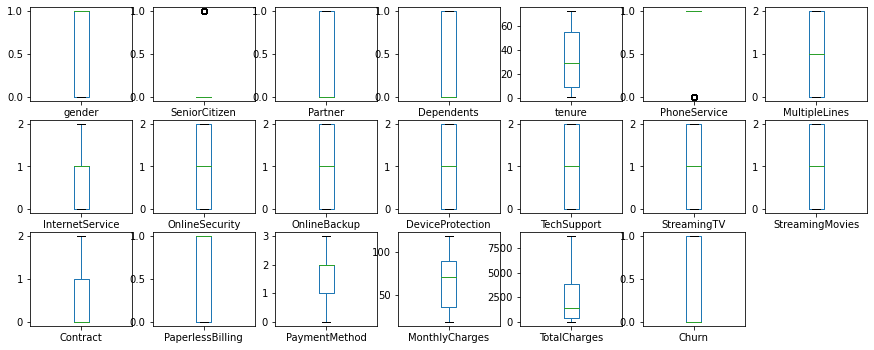

In [43]:
df1.plot(kind='box',subplots=True, layout=(5,7),figsize=(15,10))

## Removing Outliers:

In [44]:
df1.shape

(7032, 20)

In [45]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df1))
z.shape

(7032, 20)

In [46]:
threshold =3
print(np.where(z>3))

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
        114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
        215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
        278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
        387,  398,  424,  431,  435,  452,  465,  481,  494,  497,  543,
        568,  595,  609,  615,  619,  633,  659,  666,  668,  673,  676,
        687,  715,  717,  734,  763,  774,  782,  788,  792,  811,  827,
        841,  845,  857,  864,  871,  873,  875,  882,  891,  915,  932,
        938,  940,  957,  970, 1008, 1015, 1034, 1047, 1048, 1050, 1069,
       1106, 1115, 1118, 1140, 1142, 1146, 1157, 1165, 1178, 1200, 1217,
       1221, 1238, 1251, 1253, 1267, 1274, 1294, 1307, 1322, 1327, 1329,
       1330, 1344, 1347, 1360, 1374, 1397, 1402, 1411, 1447, 1474, 1475,
       1476, 1495, 1501, 1508, 1514, 1555, 1557, 1576, 1579, 1609, 1615,
       1629, 1632, 1647, 1684, 1687, 1689, 1698, 1

In [47]:
df_new_z=df1[(z<3).all(axis=1)]
print(df1.shape)
print(df_new_z.shape)

(7032, 20)
(6352, 20)


### Data loss

In [48]:
loss_percentage=(7032-6352)/7032*100
print(loss_percentage)

9.670079635949943


Observation- 9% of data has been loss

## Dropping the columns having 70% correlated

In [49]:
X= df_new_z.drop("Churn",axis=1)
y=df_new_z["Churn"]

In [50]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=0)

In [51]:
X_train.shape, X_test.shape

((4446, 19), (1906, 19))

In [52]:
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  
                col_corr.add(colname)
    return col_corr

In [53]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

1

## Checking the columns having more than 70% correaltion and dropping them

In [54]:
corr_features

{'TotalCharges'}

In [55]:
df_new_z.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,820.50,1
6,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,1949.40,0


In [56]:
df_new_z=df_new_z.drop(corr_features,axis=1)


## Finding the unique value for all columns

In [57]:
for i in df_new_z:
    print(i , len(df[i].unique()))

gender 2
SeniorCitizen 2
Partner 2
Dependents 2
tenure 72
PhoneService 2
MultipleLines 3
InternetService 3
OnlineSecurity 3
OnlineBackup 3
DeviceProtection 3
TechSupport 3
StreamingTV 3
StreamingMovies 3
Contract 3
PaperlessBilling 2
PaymentMethod 4
MonthlyCharges 1584
Churn 2


## Checking VIF 

In [58]:
names = list(df_new_z.drop(columns=["Churn"]))

In [59]:
for index in range(0, len(names)):
            y = df_new_z.loc[:, df_new_z.columns == names[index]]
            x = df_new_z.loc[:, df_new_z.columns != names[index]]
            model = sm.OLS(y, x)                       
            results = model.fit()
            rsq = results.rsquared
            vif = round(1 / (1 - rsq), 2)
            print("R Square value of {} column is {} keeping all other columns as independent features".format(
              names [index], (round(rsq, 2))
                    )
            )
            print("Variance Inflation Factor of {} column is {} n".format(
                 names[index], vif)
          )
            print()

R Square value of gender column is 0.0 keeping all other columns as independent features
Variance Inflation Factor of gender column is 1.0 n

R Square value of SeniorCitizen column is 0.13 keeping all other columns as independent features
Variance Inflation Factor of SeniorCitizen column is 1.15 n

R Square value of Partner column is 0.32 keeping all other columns as independent features
Variance Inflation Factor of Partner column is 1.47 n

R Square value of Dependents column is 0.28 keeping all other columns as independent features
Variance Inflation Factor of Dependents column is 1.38 n

R Square value of tenure column is 0.66 keeping all other columns as independent features
Variance Inflation Factor of tenure column is 2.97 n

R Square value of PhoneService column is 0.96 keeping all other columns as independent features
Variance Inflation Factor of PhoneService column is 24.34 n

R Square value of MultipleLines column is 0.29 keeping all other columns as independent features
Vari

## Scalling the data and creating ML

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
maxAcc = 0
maxRs =0
X1 = df_new_z.drop('Churn', axis=1)
y1 = df_new_z['Churn']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X1)


for i in range(1,300):
    x_train,x_test,y_train,y_test =train_test_split(X_scaled,y1,test_size=.20,random_state=i)
    Lr=LogisticRegression()
    Lr.fit(x_train,y_train)
    predrf = Lr.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAcc :
        maxAcc=acc
        maxRs =i
print("Best accuracy is ",maxAcc," on Random_state ",maxRs)

Best accuracy is  0.8316286388670339  on Random_state  217


In [61]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y1, test_size=0.2, random_state=217)

# Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
Lr = LogisticRegression()
Lr.fit(x_train,y_train)
predlr = Lr.predict(x_test)
print("Accuracy ", accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))


Accuracy  83.16286388670339
[[884  87]
 [127 173]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       971
           1       0.67      0.58      0.62       300

    accuracy                           0.83      1271
   macro avg       0.77      0.74      0.75      1271
weighted avg       0.83      0.83      0.83      1271



# Decision Tree Classifier

In [63]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print("Accuracy ", accuracy_score(y_test,preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy  73.64280094413847
[[795 176]
 [159 141]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       971
           1       0.44      0.47      0.46       300

    accuracy                           0.74      1271
   macro avg       0.64      0.64      0.64      1271
weighted avg       0.74      0.74      0.74      1271



# Random Forest Classifier

In [64]:
    from sklearn.ensemble import RandomForestClassifier

    rf = RandomForestClassifier()
    rf.fit(x_train,y_train)
    predrf = rf.predict(x_test)
    print("Accuracy ", accuracy_score(y_test,predrf)*100)
    print(confusion_matrix(y_test,predrf))
    print(classification_report(y_test,predrf))

Accuracy  81.51062155782847
[[889  82]
 [153 147]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       971
           1       0.64      0.49      0.56       300

    accuracy                           0.82      1271
   macro avg       0.75      0.70      0.72      1271
weighted avg       0.80      0.82      0.81      1271



# SVC

In [65]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)
predsv = svc.predict(x_test)
print("Accuracy ", accuracy_score(y_test,predsv)*100)
print(confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv))

Accuracy  82.29740361919748
[[897  74]
 [151 149]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       971
           1       0.67      0.50      0.57       300

    accuracy                           0.82      1271
   macro avg       0.76      0.71      0.73      1271
weighted avg       0.81      0.82      0.81      1271



# Cross Validation

In [66]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(Lr,X1,y1,cv=5)
print("Cross validation score of Logistic Regression model :", scr.mean())

Cross validation score of Logistic Regression model : 0.802579406134422


In [67]:
scr = cross_val_score(rf,X1,y1,cv=5)
print("Cross validation score of Random forest model :", scr.mean())

Cross validation score of Random forest model : 0.7866810806792345


In [68]:
scr = cross_val_score(svc,X1,y1,cv=5)
print("Cross validation score of SVC model :", scr.mean())

Cross validation score of SVC model : 0.7937639777718579


#### Logistic regression provided the best accuracy and CV score

# Hyper Parameter Tuning

### RandomForest

In [69]:
from sklearn.model_selection import GridSearchCV

parameters= {'max_features' : ['auto','sqrt','log2'],
             'max_depth' : [4,5,6,7,8,9,10,11],
             'criterion': ['gini','entropy']}

In [70]:
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 9, 'max_features': 'sqrt'}

In [71]:
GCV_pred= GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.8347757671125098

### SVC

In [72]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [73]:
grid = GridSearchCV(SVC(),param_grid,cv=5,scoring="accuracy")
grid.fit(x_train,y_train)
grid.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

In [74]:
grid_pred= grid.best_estimator_.predict(x_test)
accuracy_score(y_test,grid_pred)

0.8292682926829268

### Observation-  After hyper tuning Random Forest provided the best accuracy so I will go with Randon Forest Classifier for prediction

# ROC AUC Plot

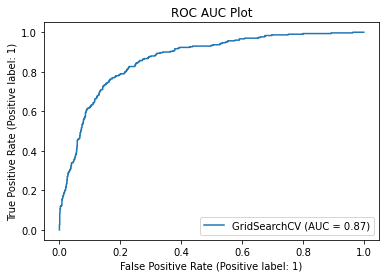

In [75]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV,x_test,y_test)
plt.title("ROC AUC Plot")
plt.show()

AUC score is #87

# Conslusion

In [76]:
import numpy as np
a=np.array(y_test)
predicted=np.array(Lr.predict(x_test))
data_com = pd.DataFrame({"Original": a,"Predicted":predicted},index = range(len(a)))
data_com.head(15)

,Original,Predicted
0,0,0
1,0,0
2,1,1
3,1,0
4,0,0
5,0,0
6,0,1
7,0,0
8,0,0
9,0,0


# Saving Model

In [77]:
import pickle
filename = 'Customer_churn.pkl'
pickle.dump(Lr,open(filename, 'wb'))